In [3]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MonthLocator, DateLocator
import matplotlib as mpl

register_matplotlib_converters()

# File locations
#----------------
the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/jun_to_sept_2021/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'


In [4]:
# Load the df 
#-------------
oxaria1_pm = pd.read_feather(the_gases+'oxaria1_pm_gf_oct.ftr').set_index(['tag','rec'])


In [3]:
oxaria1_pm.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23299961 entries, ('scs-bgx-536', Timestamp('2020-01-04 09:46:21+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-02-28 23:59:54+0000', tz='UTC'))
Data columns (total 44 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   val.mtf1                 float32
 1   val.pm1                  float32
 2   val.mtf5                 float32
 3   val.pm2p5                float32
 4   val.bin:0                float32
 5   val.bin:1                float32
 6   val.bin:2                float32
 7   val.bin:3                float32
 8   val.bin:4                float32
 9   val.bin:5                float32
 10  val.bin:6                float32
 11  val.bin:7                float32
 12  val.bin:8                float32
 13  val.bin:9                float32
 14  val.bin:10               float32
 15  val.bin:11               float32
 16  val.bin:12               float32
 17  val.bin:13               float32
 18  v

<Figure size 432x288 with 0 Axes>

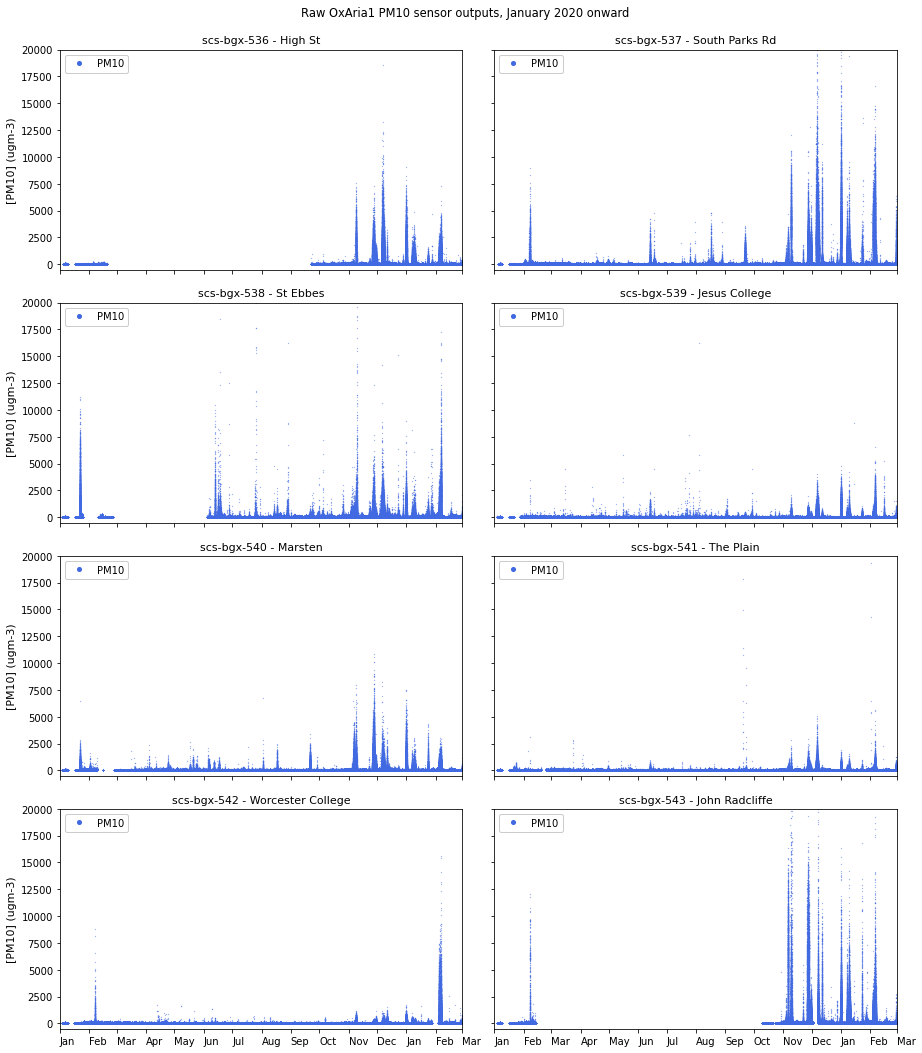

In [4]:
# Loop through PM10 plots with a log scale to compare time series & size fractions

df = oxaria1_pm.iloc[:,[29,43]]

plt.style.use('fast')
plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 PM10 sensor outputs, January 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.pm10', c='royalblue',linewidth=0.5, marker='o', ms=0.2, ls='', label='PM10', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=11)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=10
        )
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-500, 20000)
    ax.set_ylabel('[PM10] (ugm-3)', fontsize=11)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.08, hspace=0.15)
    #plt.grid(True, which='major', axis='both')
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left') 
    
#plt.savefig(pngs+'oxaria1_pm10_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


<Figure size 432x288 with 0 Axes>

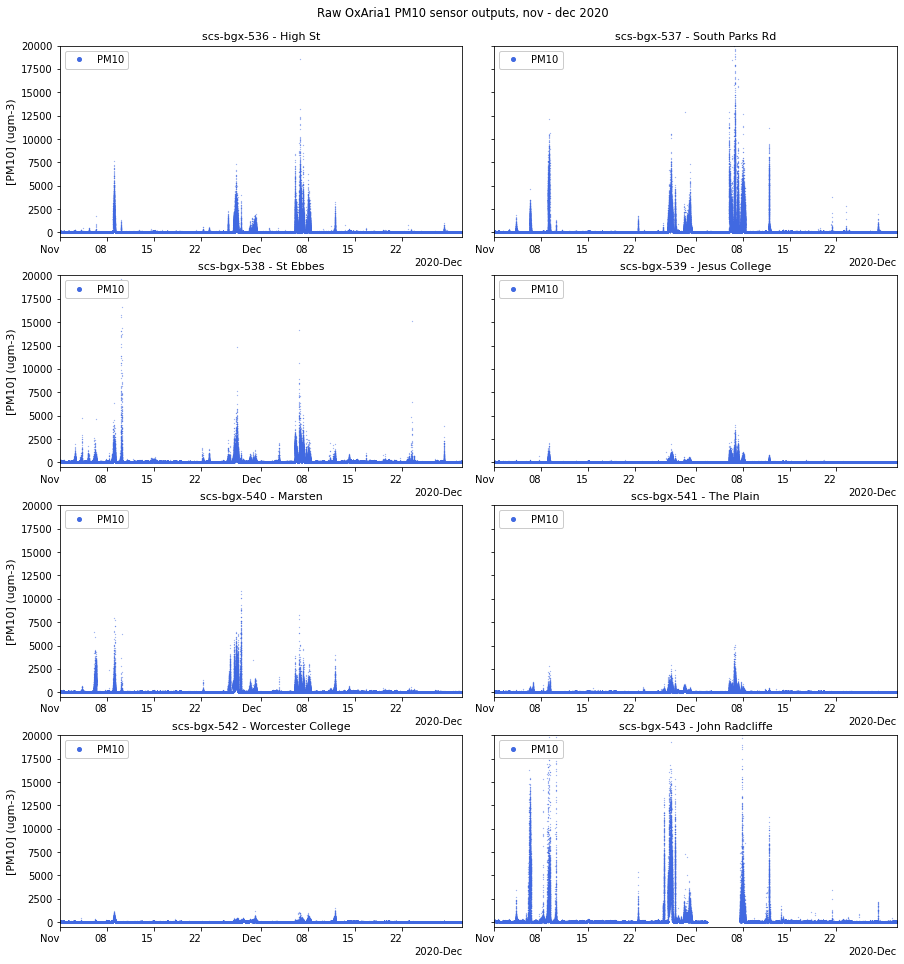

In [21]:
# Loop through PM10 plots with a log scale to compare time series & size fractions

plt.style.use('fast')
plt.tight_layout()
myFmt = mdates.DateFormatter('%d/%m')
start_date=dt.datetime(2020,11,1,tzinfo=dt.timezone.utc)
end_date=dt.datetime(2020,12,31, tzinfo=dt.timezone.utc)
locator = mdates.AutoDateLocator(minticks=2, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)


df = oxaria1_pm.query('@start_date <= rec <= @end_date')

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=True, figsize=(15,18))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 PM10 sensor outputs, nov - dec 2020 ', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0] 
    dat.plot(y='val.pm10', c='royalblue',linewidth=0.5, marker='o', ms=0.2, ls='', label='PM10', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=11)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=10
        )
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    #plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-500, 20000)
    ax.set_ylabel('[PM10] (ugm-3)', fontsize=11)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.08, hspace=0.20)
    #plt.grid(True, which='major', axis='both')
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left') 
    
#plt.savefig(pngs+'oxaria1_pm10_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


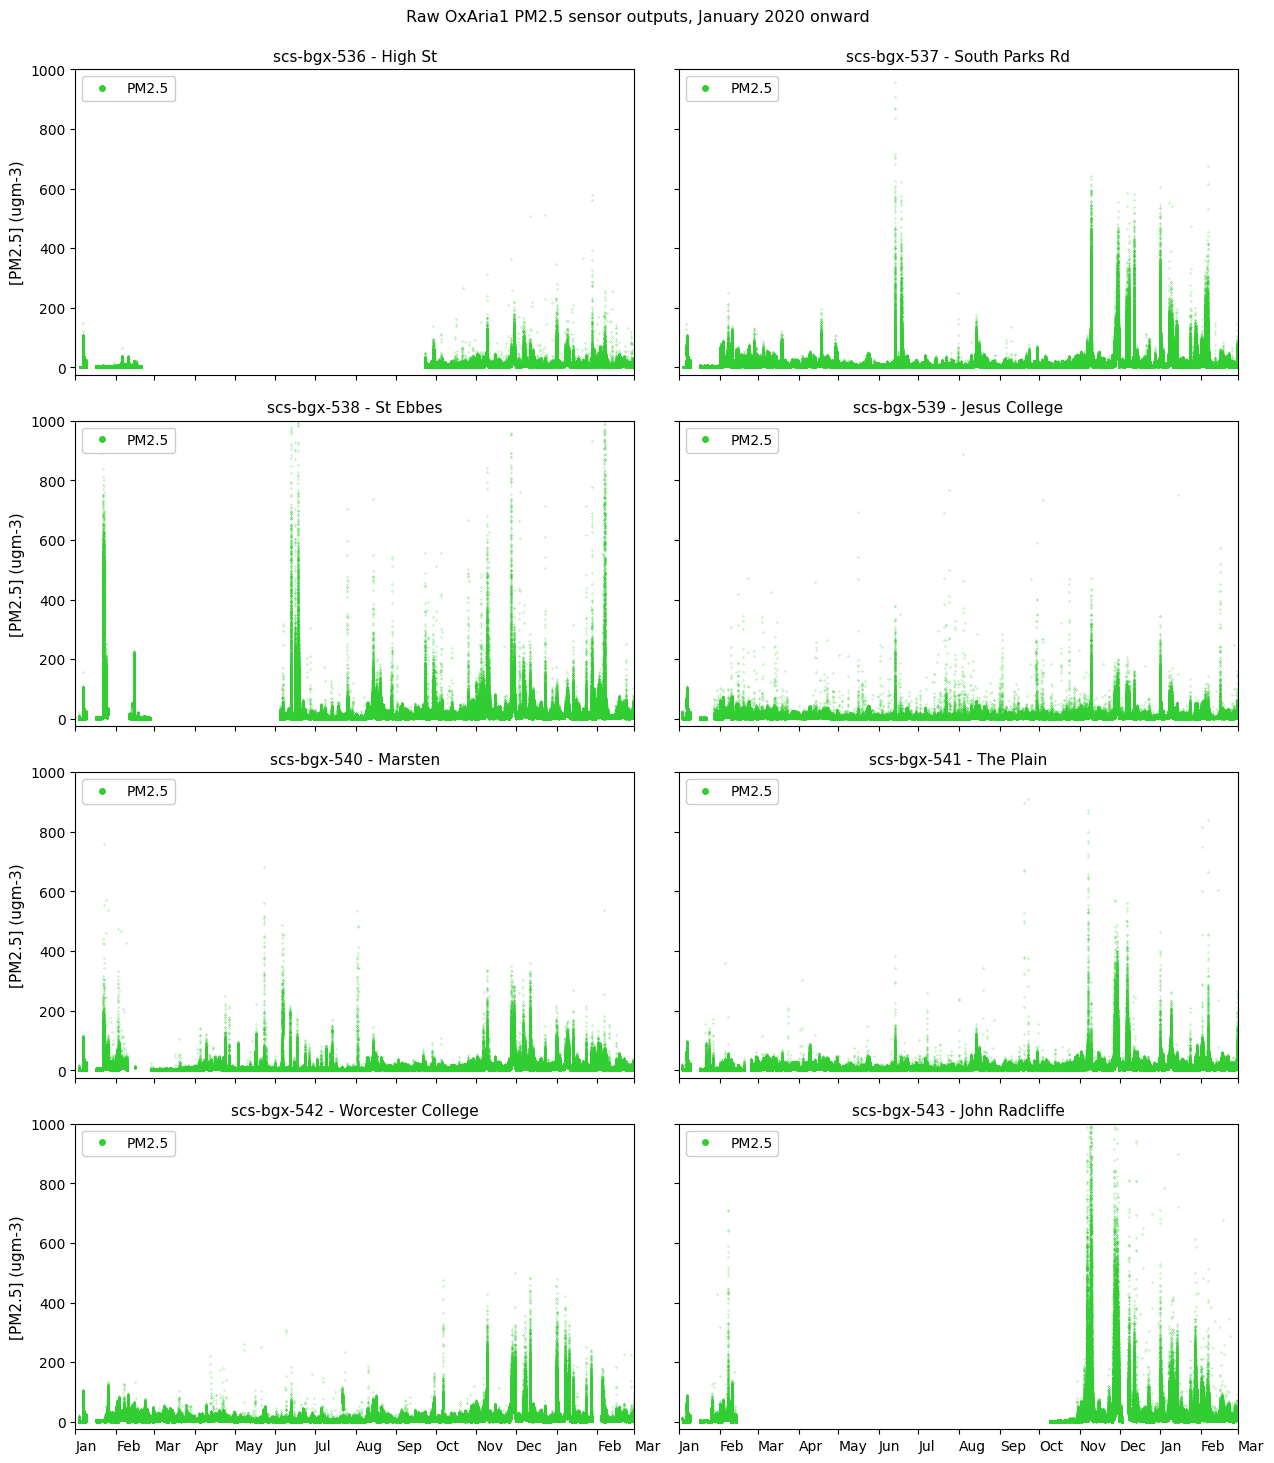

In [51]:
# Loop through PM2.5 plots with a log scale to compare time series & size fractions

df = oxaria1_pm.iloc[:, [3, 43]]

plt.style.use('fast')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020,1,1)
end_date = dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=4,
                         ncols=2,
                         sharex=True,
                         sharey=True,
                         figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 PM2.5 sensor outputs, January 2020 onward',
             fontsize=11.5,
             y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = list(dat['name'].unique())[0]
    dat.plot(y='val.pm2p5', c='limegreen',linewidth=0.5, marker='o', ms=0.2, ls='', label='PM2.5', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag + ' - ' + t_name), fontsize=11)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-25, 1000)
    ax.set_ylabel('[PM2.5] (ugm-3)', fontsize=11)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.08, hspace=0.15)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs + 'oxaria1_pm25_raw_sensor_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()

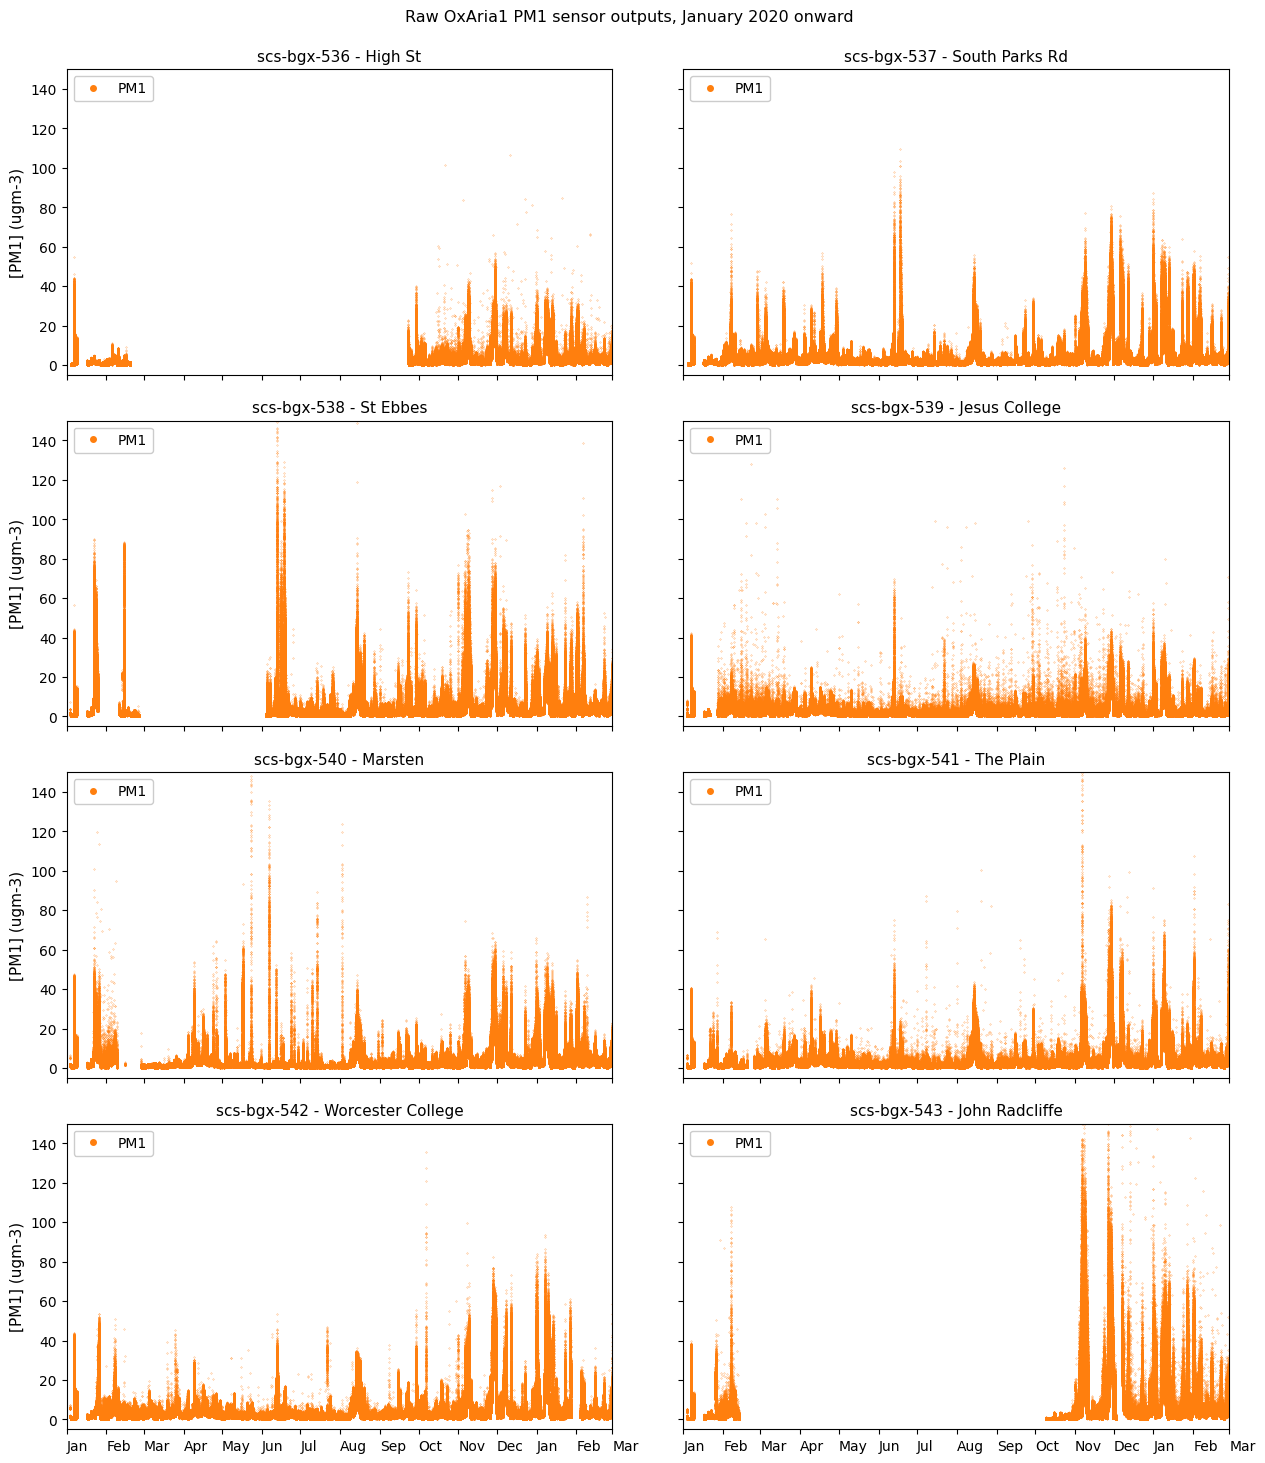

In [55]:
# Loop through PM1 plots with a log scale to compare time series & size fractions

df = oxaria1_pm.iloc[:, [1, 43]]

plt.style.use('fast')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2021, 3, 1)

fig, axes = plt.subplots(nrows=4,
                         ncols=2,
                         sharex=True,
                         sharey=True,
                         figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 PM1 sensor outputs, January 2020 onward',
             fontsize=11.5,
             y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = list(dat['name'].unique())[0]
    dat.plot(y='val.pm1', c='tab:orange',linewidth=0.5, marker='o', ms=0.2, ls='', label='PM1', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag + ' - ' + t_name), fontsize=11)
    ax.tick_params(axis='x', which='major', labelrotation=0, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-5, 150)
    ax.set_ylabel('[PM1] (ugm-3)', fontsize=11)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.13, hspace=0.15)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs + 'oxaria1_pm1_raw_sensor_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()